# Calculate the single trajectory ***Average Capture Time*** and the overall average time interval for all trajectories

In [1]:
import numpy as np
def calculate_SE(data, groups):
    """
    将数据分成指定数量的组，计算每个组的平均值，然后计算这些平均值的标准误差(SE)。
    """
    n = len(data)
    # 确保能够平均分组
    if n < groups:
        raise ValueError("数据量少于分组数量，无法分组。")
    
    # 计算每组的大小，使用整除 // 来确保得到整数
    group_size = n // groups
    
    # 初始化一个列表来存储每个子组的平均值
    group_means = []
    
    for i in range(groups):
        # 计算每个子组的开始和结束索引
        start_idx = i * group_size
        # 对于最后一个子组，确保包含所有剩余的数据
        if i == groups - 1:
            end_idx = n
        else:
            end_idx = start_idx + group_size
        # 计算子组的平均值并添加到列表中
        group_mean = np.mean(data[start_idx:end_idx])
        group_means.append(group_mean)
    
    # 计算所有子组平均值的标准差，并除以 sqrt(groups) 来计算标准误差
    se = np.std(group_means, ddof=1) / np.sqrt(groups)
    
    return se

In [2]:
interval_value= 500

In [3]:
import numpy as np
from multiprocessing import Pool

def process_path(path):
    all_time_intervals = []
    for n in range(1, 51):
        file_path = f'{path}COLVAR{n}'
        data = np.loadtxt(file_path, comments=['@', '#'])
        '''
        # 使用向量化的方式找到第一个同时满足条件的索引
        index = np.where((data[:, 1] >= 0.8) & (data[:, 2] >= 0.8))[0]
        if index.size > 0:
            all_time_intervals.append(data[index[0], 0])
        '''
        index1 = np.where((data[:, 1] >= 0.8) & (data[:, 2] >= 0.8))[0]
        frame_interval = interval_value
        index2 = []
        for idx in index1:
            if idx + frame_interval < len(data) and data[idx + frame_interval, 2] >= 0.8:
                index2.append(idx)

        if  len(index2) > 0:
            all_time_intervals.append(data[index2[0], 0]/10) # from frame to ns
        else:
            continue
            
    if all_time_intervals:
        overall_average_time_interval = np.mean(all_time_intervals)
        ste = calculate_SE(all_time_intervals,10)
    else:
        overall_average_time_interval = np.nan
        ste = np.nan

    return {
        'path': path,
        'Ncap': len(all_time_intervals),
        'overall_average_time_interval': overall_average_time_interval,
        'ste': ste
    }

if __name__ == "__main__":
    paths = [
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.37/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.4/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.45/',
    ]

    # 使用多进程处理每个路径
    with Pool(processes=4) as pool:  # 根据你的CPU核心数调整processes的值
        Cap = pool.map(process_path, paths)

    # 打印结果
    for result in Cap:
        print("Path:", result['path'])
        print("MPTcap:", result['overall_average_time_interval'])
        print("Standard error:", result['ste'])
        print("Ncap:", result['Ncap'])

Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/
MPTcap: 3313.597435897436
Standard error: 518.1409807686049
Ncap: 39
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/
MPTcap: 466.528
Standard error: 98.94769101567422
Ncap: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.37/
MPTcap: 649.402
Standard error: 139.99363069479662
Ncap: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.4/
MPTcap: 999.4780000000001
Standard error: 153.2676876999483
Ncap: 50
Path: /hpc2hdd/home/jchen901/data

# Calculate the single trajectory ***Average Bind Time*** and the overall average time interval for all trajectories

In [4]:
import numpy as np
from multiprocessing import Pool

def process_path(path):
    all_time_intervals = []
    for n in range(1, 51):
        file_path = f'{path}COLVAR{n}'
        data = np.loadtxt(file_path, comments=['@', '#'])

        # 使用向量化的方式找到第一个同时满足条件的索引
        index = np.where((data[:, 3] >= 0.5) | (data[:, 4] >= 0.5))[0]
        if index.size > 0:
            all_time_intervals.append(data[index[0], 0]/10) # from frame to ns

    if all_time_intervals:
        overall_average_time_interval = np.mean(all_time_intervals)
        ste = calculate_SE(all_time_intervals,10)
    else:
        overall_average_time_interval = np.nan
        ste = np.nan

    return {
        'path': path,
        'Nbind': len(all_time_intervals),
        'overall_average_time_interval': overall_average_time_interval,
        'ste': ste
    }

if __name__ == "__main__":
    paths = [
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.37/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.4/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.45/',
    ]

    # 使用多进程处理每个路径
    with Pool(processes=4) as pool:  # 根据你的CPU核心数调整processes的值
        Bind = pool.map(process_path, paths)

    # 打印结果
    for result in Bind:
        print("Path:", result['path'])
        print("MPTbind:", result['overall_average_time_interval'])
        print("Standard error:", result['ste'])
        print("Nbind:", result['Nbind'])

Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/
MPTbind: 2.08
Standard error: 0.326339972693781
Nbind: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/
MPTbind: 1.546
Standard error: 0.2589560237226047
Nbind: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.37/
MPTbind: 2.03
Standard error: 0.3929517923500427
Nbind: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.4/
MPTbind: 1.452
Standard error: 0.20677846438479355
Nbind: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tu

# Calculate the single trajectory ***Average bind_to_in Time*** and the overall average time interval for all trajectories

In [5]:
import numpy as np
from multiprocessing import Pool

def process_path(path):
    all_time_intervals = []
    for n in range(1, 51):
        file_path = f'{path}COLVAR{n}'
        data = np.loadtxt(file_path, comments=['@', '#'])

        # 使用向量化的方式找到第一个同时满足条件的索引
        index1 = np.where((data[:, 3] >= 0.5) | (data[:, 4] >= 0.5))[0]
        index2 = np.where (data[:, 1] >= 0.8)[0]
        if index1.size > 0 and index2.size > 0:
            all_time_intervals.append((data[index2[0], 0] - data[index1[0], 0])/10)  # 1/10 from frame to ns
    
    if all_time_intervals:
        overall_average_time_interval = np.mean(all_time_intervals)
        ste = calculate_SE(all_time_intervals,10)
    else:
        overall_average_time_interval = np.nan
        ste = np.nan

    return {
        'path': path,
        'Nin': len(all_time_intervals),
        'overall_average_time_interval': overall_average_time_interval,
        'ste': ste
    }

if __name__ == "__main__":
    paths = [
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.37/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.4/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.45/',
    ]
    # 使用多进程处理每个路径
    with Pool(processes=4) as pool:  # 根据你的CPU核心数调整processes的值
        Capbind_to_in = pool.map(process_path, paths)

    # 打印结果
    for result in Capbind_to_in:
        print("Path:", result['path'])
        print("MPTbind_to_in:", result['overall_average_time_interval'])
        print("Standard error:", result['ste'])
        print("Nbind_to_in:", result['Nin'])


Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/
MPTbind_to_in: 16.964000000000002
Standard error: 3.375495749598206
Nbind_to_in: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/
MPTbind_to_in: 218.75600000000003
Standard error: 63.86474178031777
Nbind_to_in: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.37/
MPTbind_to_in: 482.23
Standard error: 130.1354017680559
Nbind_to_in: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.4/
MPTbind_to_in: 934.6480000000001
Standard error: 1

# Calculate the single trajectory ***Average in_to_close Time*** and the overall average time interval for all trajectories

In [6]:
import numpy as np
from multiprocessing import Pool

def process_path(path):
    all_time_intervals = []
    for n in range(1, 51):
        file_path = f'{path}COLVAR{n}'
        data = np.loadtxt(file_path, comments=['@', '#'])
        '''
        # 使用向量化的方式找到第一个同时满足条件的索引
        index1 = np.where (data[:, 1] >= 0.8)[0]
        index2 = np.where((data[:, 1] >= 0.8) & (data[:, 2] >= 0.8))[0]
        if index1.size > 0 and index2.size > 0:
            all_time_intervals.append(data[index2[0], 0] - data[index1[0], 0])  
        '''
        index1 = np.where(data[:, 1] >= 0.8)[0]
        index2 = np.where((data[:, 1] >= 0.8) & (data[:, 2] >= 0.8))[0]
        frame_interval = interval_value
        index3 = []
        for idx in index2:
            if idx + frame_interval < len(data) and data[idx + frame_interval, 2] >= 0.8:
                index3.append(idx)

        if index1.size > 0 and len(index3) > 0:
            all_time_intervals.append((data[index3[0], 0] - data[index1[0], 0])/10) # 1/10 from frame to ns
        else:
            continue
        
    if all_time_intervals:
        overall_average_time_interval = np.mean(all_time_intervals)
        ste = calculate_SE(all_time_intervals,10)
    else:
        overall_average_time_interval = np.nan
        ste = np.nan

    return {
        'path': path,
        'Nin_to_close': len(all_time_intervals),
        'overall_average_time_interval': overall_average_time_interval,
        'ste': ste
    }

if __name__ == "__main__":
    paths = [
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.37/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.4/',
        '/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.45/',
    ]

    # 使用多进程处理每个路径
    with Pool(processes=4) as pool:  # 根据你的CPU核心数调整processes的值
        Capclose = pool.map(process_path, paths)

    # 打印结果
    for result in Capclose:
        print("Path:", result['path'])
        print("MPTin_to_close:", result['overall_average_time_interval'])
        print("Standard error:", result['ste'])
        print("Nin_to_close:", result['Nin_to_close'])

Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.3/
MPTin_to_close: 3296.1333333333328
Standard error: 518.6646001881647
Nin_to_close: 39
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.35/
MPTin_to_close: 246.226
Standard error: 50.03515129275507
Nin_to_close: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.37/
MPTin_to_close: 165.142
Standard error: 21.62288097774618
Nin_to_close: 50
Path: /hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/analysis/para_nonspecific0.6/All_knetics/order_parameter/0.4/
MPTin_to_close: 63.378
Standard error: 9.4135186242387

In [7]:

MPTcap_group=[Cap[0]['overall_average_time_interval'],Cap[1]['overall_average_time_interval'],Cap[2]['overall_average_time_interval'],Cap[3]['overall_average_time_interval'],Cap[4]['overall_average_time_interval']]
MPTcap_group_std=[Cap[0]['ste'],Cap[1]['ste'],Cap[2]['ste'],Cap[3]['ste'],Cap[4]['ste']]
MPTbind_group=[Bind[0]['overall_average_time_interval'],Bind[1]['overall_average_time_interval'],Bind[2]['overall_average_time_interval'],Bind[3]['overall_average_time_interval'],Bind[4]['overall_average_time_interval']]
MPTbind_group_std=[Bind[0]['ste'],Bind[1]['ste'],Bind[2]['ste'],Bind[3]['ste'],Bind[4]['ste']]
Nbind_group=[Bind[0]['Nbind'],Bind[1]['Nbind'],Bind[2]['Nbind'],Bind[3]['Nbind'],Bind[4]['Nbind']]
MPTbind_to_in_group=[Capbind_to_in[0]['overall_average_time_interval'],Capbind_to_in[1]['overall_average_time_interval'],Capbind_to_in[2]['overall_average_time_interval'],Capbind_to_in[3]['overall_average_time_interval'],Capbind_to_in[4]['overall_average_time_interval']]
MPTbind_to_in_group_std=[Capbind_to_in[0]['ste'],Capbind_to_in[1]['ste'],Capbind_to_in[2]['ste'],Capbind_to_in[3]['ste'],Capbind_to_in[4]['ste']]
Nbind_to_in_group=[Capbind_to_in[0]['Nin'],Capbind_to_in[1]['Nin'],Capbind_to_in[2]['Nin'],Capbind_to_in[3]['Nin'],Capbind_to_in[4]['Nin']]
MPTin_to_close_group=[Capclose[0]['overall_average_time_interval'],Capclose[1]['overall_average_time_interval'],Capclose[2]['overall_average_time_interval'],Capclose[3]['overall_average_time_interval'],Capclose[4]['overall_average_time_interval']]
MPTin_to_close_group_std=[Capclose[0]['ste'],Capclose[1]['ste'],Capclose[2]['ste'],Capclose[3]['ste'],Capclose[4]['ste']]
Nin_to_close_group=[Capclose[0]['Nin_to_close'],Capclose[1]['Nin_to_close'],Capclose[2]['Nin_to_close'],Capclose[3]['Nin_to_close'],Capclose[4]['Nin_to_close']]



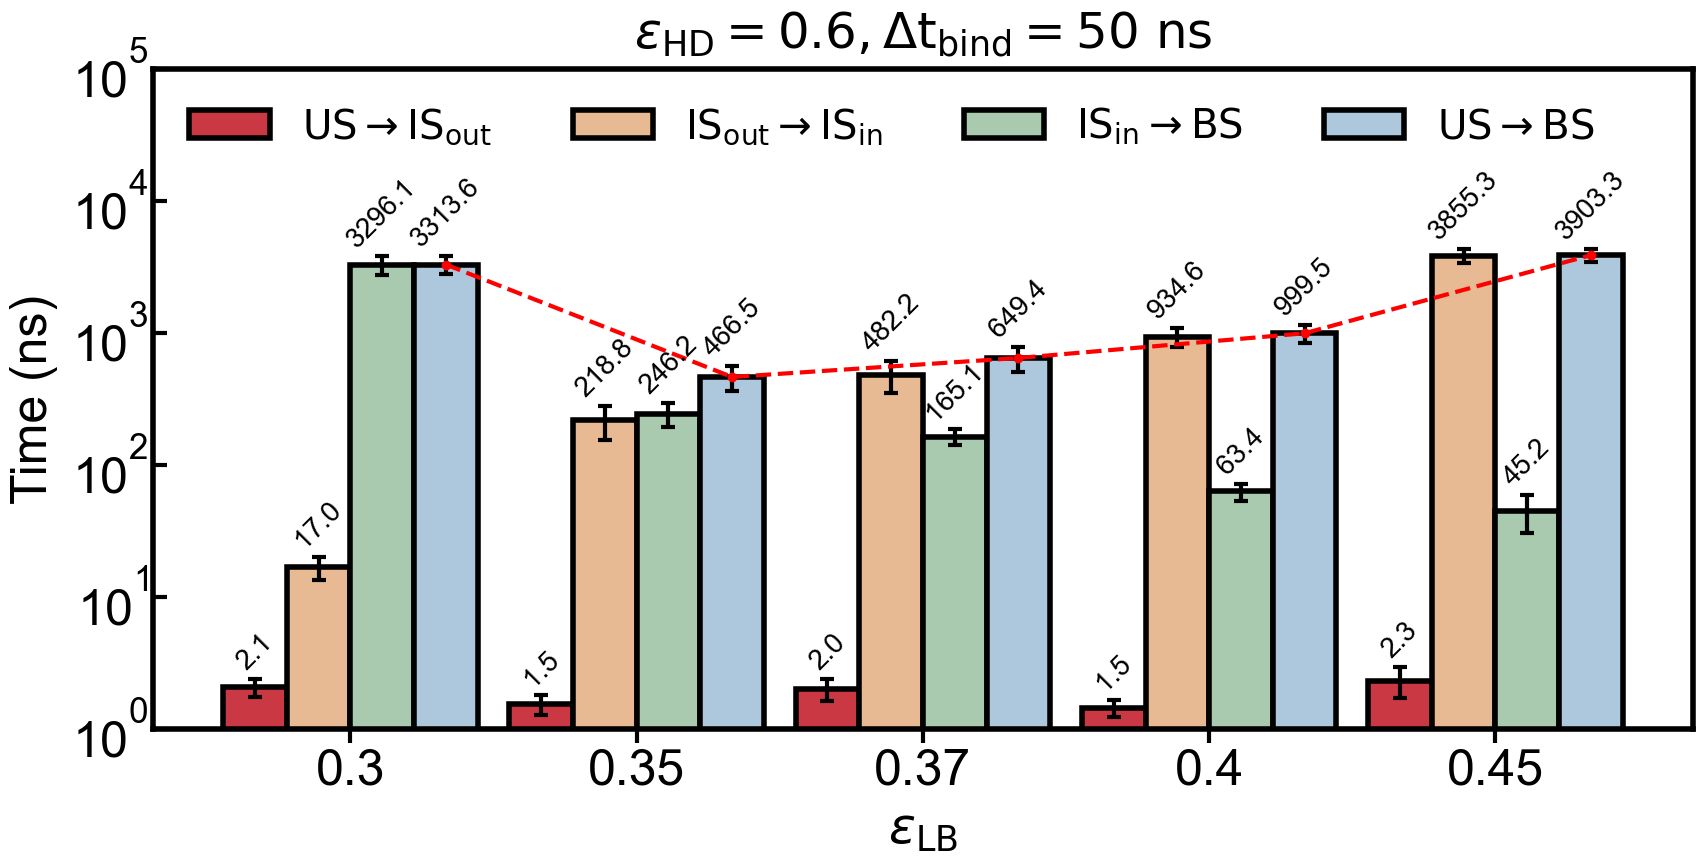

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 数据定义
species = ("0.3", "0.35", "0.37", "0.4", "0.45")
penguin_means = {
    r'$\text{US} \rightarrow \text{IS}_{\text{out}}$': MPTbind_group,
    r'$\text{IS}_{\text{out}} \rightarrow \text{IS}_{\text{in}}$': MPTbind_to_in_group,
    r'$\text{IS}_{\text{in}} \rightarrow \text{BS}$': MPTin_to_close_group,
    r'$\text{US} \rightarrow \text{BS}$': MPTcap_group,
}
penguin_std = {
    r'$\text{US} \rightarrow \text{IS}_{\text{out}}$': MPTbind_group_std,
    r'$\text{IS}_{\text{out}} \rightarrow \text{IS}_{\text{in}}$': MPTbind_to_in_group_std,
    r'$\text{IS}_{\text{in}} \rightarrow \text{BS}$': MPTin_to_close_group_std,
    r'$\text{US} \rightarrow \text{BS}$': MPTcap_group_std,
}

# 更新绘图风格
plt.rcParams.update({
    'font.family': 'Arial',  # 设置字体
    'axes.titlesize': 36,  # 标题字体大小
    'axes.labelsize': 36,  # 坐标轴标签字体大小
    'xtick.labelsize': 36,  # X轴刻度字体大小
    'ytick.labelsize': 36,  # Y轴刻度字体大小
    'legend.fontsize': 29,  # 图例字体大小
    'figure.figsize': (18, 9),  # 图像大小
    'axes.linewidth': 4,  # 坐标轴线宽
    'xtick.major.size': 10, # x 轴主刻度长度
    'ytick.major.size': 10, # y 轴主刻度长度
    'xtick.minor.size': 5, # x 轴次刻度长度
    'ytick.minor.size': 5, # y 轴主刻度长度
    'xtick.major.width': 3, # x 轴主刻度线宽
    'ytick.major.width': 3, # y 轴主刻度线宽
    'xtick.minor.width': 0, # x 轴次刻度线宽
    'ytick.minor.width': 0, # y 轴主刻度线宽
    'axes.grid': False,  # 关闭背景网格
})

# 设置柱状图参数
width = 0.3  # 柱宽
group_gap = 0.15  # 组间距
x = np.arange(len(species)) * (len(penguin_means) * width + group_gap)  # 添加组间距

fig, ax = plt.subplots()  # 设置图大小（符合期刊风格）

multiplier = 0
top_points = []  # 用于存储最后一组柱的顶点坐标

# 自定义颜色列表
colors = ['#C93843', '#E7BA93', '#A9CAAF', '#ADC8DD']

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, capsize=5, 
                   yerr=penguin_std[attribute], color=colors[multiplier], error_kw={'elinewidth': 3,'capthick': 3}, edgecolor='black',linewidth=4)
    
    # 设置误差条的字体
    labels = ax.bar_label(rects, padding=3, fmt='%.1f', fontsize=20)
    for label in labels:
        label.set_rotation(45)
    
    # 如果是每组的最后一列柱状图，记录其顶部坐标
    if multiplier == len(penguin_means) - 1:
        for rect in rects:
            top_points.append((rect.get_x() + rect.get_width() / 2, rect.get_height()))
    
    multiplier += 1

# 提取散点坐标
x_coords = [point[0] for point in top_points]
y_coords = [point[1] for point in top_points]

# 绘制散点和点线图
ax.scatter(x_coords, y_coords, color='red', zorder=5)
ax.plot(x_coords, y_coords, color='red', linestyle='--', linewidth=3)

# 添加图例和标签
ax.set_xlabel(r'$\epsilon_\text{LB}$', labelpad=10)
ax.set_ylabel(r'Time (ns)', labelpad=10)
ax.set_title(r'$\epsilon_\text{HD} = 0.6, \Delta \text{t}_\text{bind} = 50 \text{ ns}$',pad = 15)
ax.set_xticks(x + (len(penguin_means) - 1) * width / 2, species)
ax.legend(loc='upper left', ncols=4, frameon=False)  # 图例位于左上角，移除边框

# 设置对数 y 轴
ax.set_yscale('log')
ax.set_ylim(1, 100000)  # 确保对数轴有意义的范围

# x 轴刻度朝内
plt.tick_params(axis='x', which='both', direction='out')
# y 轴刻度朝内
plt.tick_params(axis='y', which='both', direction='in')

# 调整边距以避免文字被裁剪
fig.tight_layout(pad=2)
# 保存和展示
#plt.savefig("nonspecific0.6_plot_50ns.png", dpi=300, bbox_inches='tight')  # 保存高分辨率图片
plt.show()

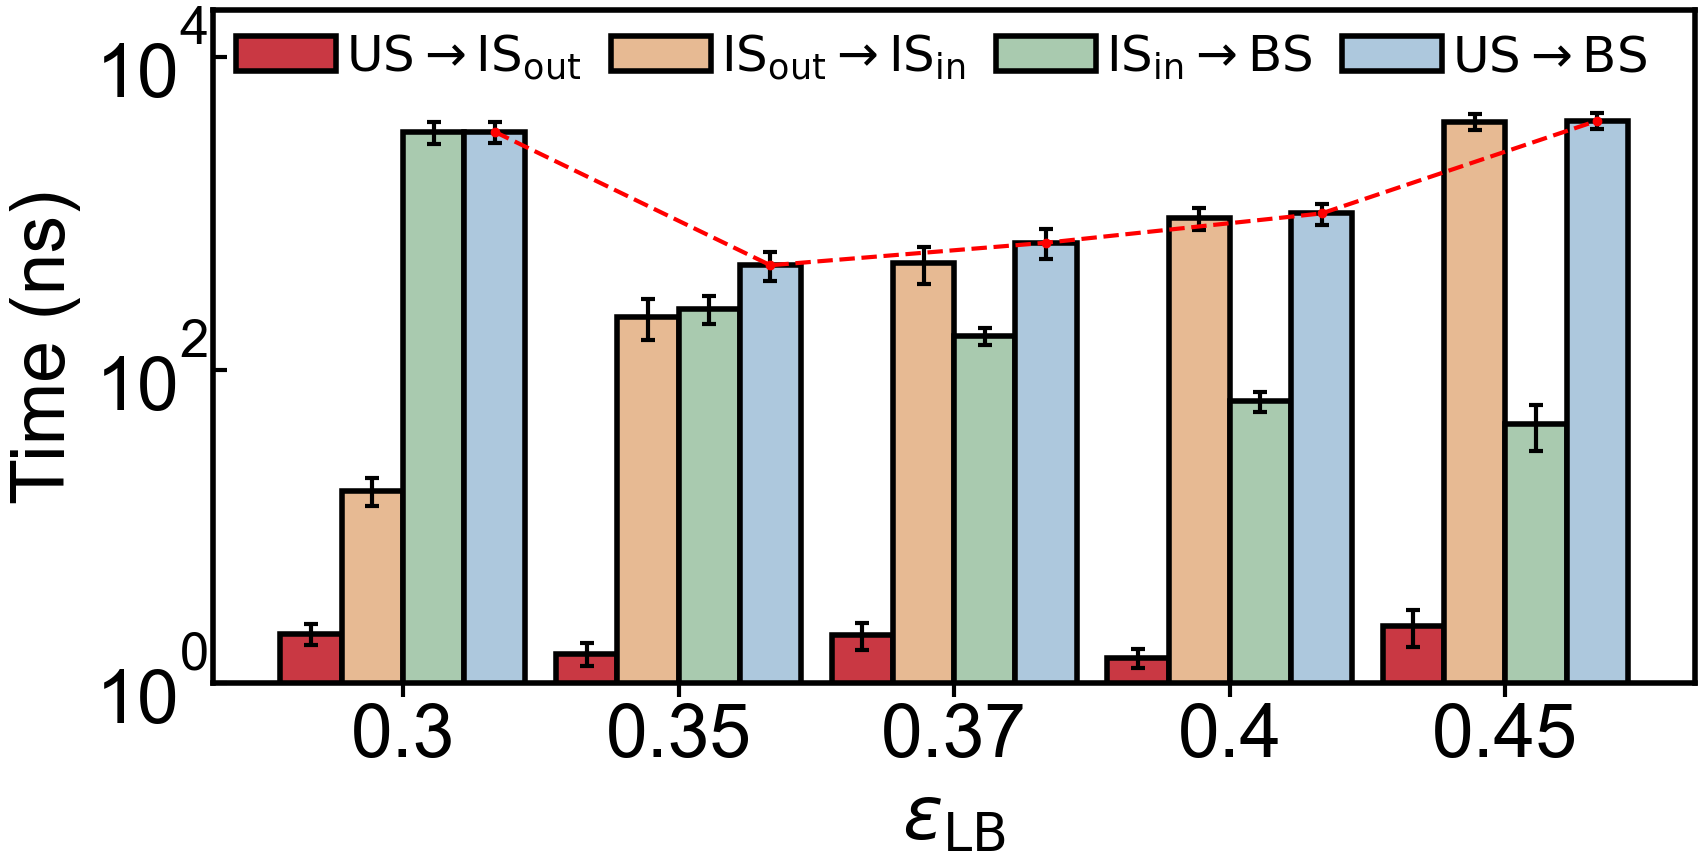

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 数据定义
species = ("0.3", "0.35", "0.37", "0.4", "0.45")
penguin_means = {
    r'$\text{US} \rightarrow \text{IS}_{\text{out}}$': MPTbind_group,
    r'$\text{IS}_{\text{out}} \rightarrow \text{IS}_{\text{in}}$': MPTbind_to_in_group,
    r'$\text{IS}_{\text{in}} \rightarrow \text{BS}$': MPTin_to_close_group,
    r'$\text{US} \rightarrow \text{BS}$': MPTcap_group,
}
penguin_std = {
    r'$\text{US} \rightarrow \text{IS}_{\text{out}}$': MPTbind_group_std,
    r'$\text{IS}_{\text{out}} \rightarrow \text{IS}_{\text{in}}$': MPTbind_to_in_group_std,
    r'$\text{IS}_{\text{in}} \rightarrow \text{BS}$': MPTin_to_close_group_std,
    r'$\text{US} \rightarrow \text{BS}$': MPTcap_group_std,
}

# 更新绘图风格
plt.rcParams.update({
    'font.family': 'Arial',  # 设置字体
    'axes.titlesize': 54,  # 标题字体大小
    'axes.labelsize': 54,  # 坐标轴标签字体大小
    'xtick.labelsize': 54,  # X轴刻度字体大小
    'ytick.labelsize': 54,  # Y轴刻度字体大小
    'legend.fontsize': 36,  # 图例字体大小
    'figure.figsize': (18, 9),  # 图像大小
    'axes.linewidth': 4,  # 坐标轴线宽
    'xtick.major.size': 10, # x 轴主刻度长度
    'ytick.major.size': 10, # y 轴主刻度长度
    'xtick.minor.size': 5, # x 轴次刻度长度
    'ytick.minor.size': 5, # y 轴主刻度长度
    'xtick.major.width': 3, # x 轴主刻度线宽
    'ytick.major.width': 3, # y 轴主刻度线宽
    'xtick.minor.width': 0, # x 轴次刻度线宽
    'ytick.minor.width': 0, # y 轴主刻度线宽
    'axes.grid': False,  # 关闭背景网格
})

# 设置柱状图参数
width = 0.15  # 柱宽
group_gap = 0.075  # 组间距
x = np.arange(len(species)) * (len(penguin_means) * width + group_gap)  # 添加组间距

fig, ax = plt.subplots()  # 设置图大小（符合期刊风格）

multiplier = 0
top_points = []  # 用于存储最后一组柱的顶点坐标

# 自定义颜色列表
colors = ['#C93843', '#E7BA93', '#A9CAAF', '#ADC8DD']

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, capsize=5, 
                   yerr=penguin_std[attribute], color=colors[multiplier], error_kw={'elinewidth': 3,'capthick': 3}, edgecolor='black',linewidth=4)
    
    # 设置误差条的字体
    #labels = ax.bar_label(rects, padding=3, fmt='%.1f', fontsize=20)
    #for label in labels:
    #   label.set_rotation(45)
    
    # 如果是每组的最后一列柱状图，记录其顶部坐标
    if multiplier == len(penguin_means) - 1:
        for rect in rects:
            top_points.append((rect.get_x() + rect.get_width() / 2, rect.get_height()))
    
    multiplier += 1

# 提取散点坐标
x_coords = [point[0] for point in top_points]
y_coords = [point[1] for point in top_points]

# 绘制散点和点线图
ax.scatter(x_coords, y_coords, color='red', zorder=5)
ax.plot(x_coords, y_coords, color='red', linestyle='--', linewidth=3)

# 添加图例和标签
ax.set_xlabel(r'$\epsilon_\text{LB}$', labelpad=10)
ax.set_ylabel(r'Time (ns)', labelpad=10)
#ax.set_title(r'$\epsilon_\text{HD} = 0.6, \Delta \text{t}_\text{bind} = 50 \text{ ns}$',pad = 15)
ax.set_xticks(x + (len(penguin_means) - 1) * width / 2, species)
ax.legend(loc='upper left', ncols=4, frameon=False, columnspacing=0.6, handletextpad=0.2,borderaxespad=0.05)  # 图例位于左上角，移除边框

# 设置对数 y 轴
ax.set_yscale('log')
ax.set_ylim(1, 20000)  # 确保对数轴有意义的范围
ax.set_yticks([1,100,10000])

# x 轴刻度朝内
plt.tick_params(axis='x', which='both', direction='out')
# y 轴刻度朝内
plt.tick_params(axis='y', which='both', direction='in')

# 调整边距以避免文字被裁剪
fig.tight_layout(pad=2)
# 保存和展示
plt.savefig("nonspecific0.6.png", dpi=300, bbox_inches='tight')  # 保存高分辨率图片
plt.show()